# Homework 2 (Math 874)
###### Submitted by Amin Shojaeighadikolaei

## This homework is consisiting of 3 part. 
- The first part is implementing the logistic regression. 
- Second part is solving the T-Test problem.
- The third problem is linear model problem.

# Problem 1 : Logistic Regression

##### In this project I want to apply logstic regression to MNIST dataset. The dataset is conssiting of 300 picture in which each picture is 28*28 array. 100 pictures are 1 , 100 are 4 and 100 are 8. At first I want to import libraries and then import the MNIST dataset and after that I want to plot some of the inputs by random.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    output = []
    for s in z:
        output.append(1 / (1 + np.exp(-s)))
    return np.asarray(output)

In [3]:
dataset= np.load(r'C:\Users\a335s717\Desktop\HW2\mnist148.npz')
new_dataset= dataset.files
X = dataset['arr_0']
Y = dataset['arr_1']
Test = dataset['arr_2']

In [4]:
print('dimension of X is: ',X.shape)
print('dimension of Y is: ',Y.shape)
print('dimension of Test is: ',Test.shape)

dimension of X is:  (300, 28, 28)
dimension of Y is:  (300,)
dimension of Test is:  (3, 28, 28)


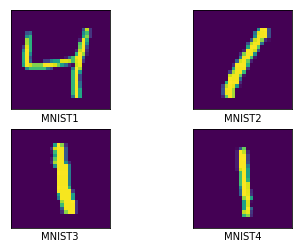

In [5]:
for c in range(4):
    plt.subplot(2,2,c+1)
    plt.imshow(X[c])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('MNIST'+str(c+1))

###### Now I want to reshape the input to change the matrix to array and then since the output is categorical I want to use onehot encoding for Input and output.

In [6]:
Input = []
Output=[]
count = np.zeros((10))
w = np.random.random((28 * 28, 3))
for x, y in zip(X,Y):
    if y in [1, 4, 8]:
        Input.append(x.reshape((28 * 28)) / 255)
        count[y] += 1
        
        if y == [1]:
            y = [1, 0, 0]
        elif y == [4]:
            y = [0, 1, 0]
        elif y == [8]:
            y = [0, 0, 1]   
        Output.append(y)

###### One of the array from MNIST dataset was 3 pictures for test. Now I want to prepare the test array.

In [7]:
x_test=[]
for xx in Test :
    x_test.append(xx.reshape((28 * 28)) / 255)

In [8]:
samples = np.asarray(Input)
labels = np.asarray(Output)
test = np.asarray(x_test)

X_train = samples
Y_train = labels
X_Test = test

###### Now I want to implement the logistic regression. In this step, at first I will calculate the product of input and initial value for weights. Then with calculating the X^T (Y-P) to update the next weights.

In [9]:
alpha = 0.0001
while True:
    yBar = np.dot(X_train, w)
    yBar = sigmoid(yBar)
    error = Y_train - yBar
    delta = np.dot(X_train.T, error)
    w += alpha * delta
    Error = np.abs(np.mean(error))
    print('Error: %.8f' % Error)
    if Error < 0.05:
        break

Error: 0.66666667
Error: 0.66666666
Error: 0.66666666
Error: 0.66666666
Error: 0.66666666
Error: 0.66666666
Error: 0.66666666
Error: 0.66666666
Error: 0.66666665
Error: 0.66666664
Error: 0.66666664
Error: 0.66666662
Error: 0.66666661
Error: 0.66666658
Error: 0.66666655
Error: 0.66666650
Error: 0.66666643
Error: 0.66666634
Error: 0.66666620
Error: 0.66666600
Error: 0.66666572
Error: 0.66666531
Error: 0.66666472
Error: 0.66666386
Error: 0.66666261
Error: 0.66666078
Error: 0.66665808
Error: 0.66665407
Error: 0.66664808
Error: 0.66663907
Error: 0.66662541
Error: 0.66660456
Error: 0.66657245
Error: 0.66652264
Error: 0.66644481
Error: 0.66632249
Error: 0.66612957
Error: 0.66582527
Error: 0.66534728
Error: 0.66460320
Error: 0.66346049
Error: 0.66173799
Error: 0.65920964
Error: 0.65563649
Error: 0.65083417
Error: 0.64477501
Error: 0.63769669
Error: 0.63009594
Error: 0.62252132
Error: 0.61533824
Error: 0.60866591
Error: 0.60241357
Error: 0.59631890
Error: 0.59000603
Error: 0.58305680
Error: 0.5

###### Now I want to test the model. From the MNIST dataset we know that 'aar_2' is the test. At first I want to plot the test samples.

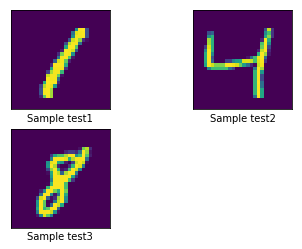

In [10]:
for c in range(3):
    plt.subplot(2,2,c+1)
    plt.imshow(Test[c])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Sample test'+str(c+1))


###### Now I want to calculate the output with the updated weights. In hence, Y=X.B. Then, I want to show the result that each input is related to which output. For doing this just note :
- Class 0 is showing 1
- Class 1 is showing 4
- Class 2 is showing 8

In [11]:
Y_Test = np.dot(X_Test[0] , w)
print(' predicted class for first sample is:  %d' % ( np.argmax(Y_Test)))
Y_Test = np.dot(X_Test[1] , w)
print(' predicted class for second sample is:  %d' % ( np.argmax(Y_Test)))
Y_Test = np.dot(X_Test[2] , w)
print(' predicted class for third sample is:  %d' % ( np.argmax(Y_Test)))

 predicted class for first sample is:  0
 predicted class for second sample is:  1
 predicted class for third sample is:  2


# Problem 2: T_Test problem

In [12]:
import numpy as np
from scipy import stats


z= np.random.normal(2, np.sqrt(5),25)
T= (np.mean(z) -2)/ np.sqrt(5/25)
P_value = stats.t.cdf(T, df=24)

In [13]:
print('The cdf value for this array is: ',P_value)

The cdf value for this array is:  0.7806760701919795


# Problem 3: Linear model

 - In this problem I just want to calculate the ((X^T)X)^(-1)(X^T)Y . At first I want to create a 100*4 matrix for inputs with U(0,1) distribution and a 100*1 matrix for Y with N(0,1) distrubution.

In [14]:
import numpy as np

Y= np.random.normal(0, np.sqrt(1),100)

X = np.random.uniform(-1,0,[100,4])

bHat = np.dot (np.dot ( np.linalg.inv(np.dot(X.T , X)) , X.T) , Y)
bHat

array([ 0.14368385, -0.34886514, -0.0479501 ,  0.35701398])